In [1]:
#Import a plotting libraries and a maths library 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import animation
%matplotlib inline

r = np.linspace(0.01,3.0,num=500) # Make a radius vector
#epsilon = 1 # Energy minimum
sigma = 0.05 # Distance to zero crossing point
#E_LJ = 4*epsilon*((sigma/r)**12-(sigma/r)**6) # Lennard-Jones potential


In [2]:
pos_1 = np.array([0.7,0.2])
pos_2 = np.array([0.1,0.2])
pos_diff = pos_1-pos_2

In [3]:
for l in range(2):
    if (np.abs(pos_diff[l])>0.5):
        pos_diff[l] = pos_diff[l]-np.copysign(1,pos_diff[l])

In [4]:
def Compute_Forces(pos,epsilon,BoxSize,DIM,N):
    Sij = np.zeros(DIM)
    Rij = np.zeros(DIM)
    acc = np.zeros([N,DIM])
    for i in range(N-1):
        for j in range(i+1,N):
            Sij = (pos[i,:]-pos[j,:])
            
            for l in range(DIM):
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l]-np.copysign(1,Sij[l])
            
            Rij = BoxSize*Sij
            
            Rsqij = np.dot(Rij,Rij)
            
            if (Rsqij<Rcutoff**2):
                r2 = 1/Rsqij
                r6 = r2**3
                r12 = r6**2
                dphi = epsilon*24*r2*(2*sigma**12*r12-sigma**6*r6)
                
                acc[i,:] = acc[i,:]+dphi*Sij
                acc[j,:] = acc[j,:]-dphi*Sij#
    
    return acc                

In [5]:
r = np.linspace(0.16,1,100)
d_phi = epsilon*24*1/r**2*(2*sigma**12/r**12-sigma**6/r**6)
#plt.ylim([-10,10])
plt.plot(r,d_phi)

NameError: name 'epsilon' is not defined

([<matplotlib.axis.XTick at 0x1ff751f0100>], [Text(0, 0, '')])

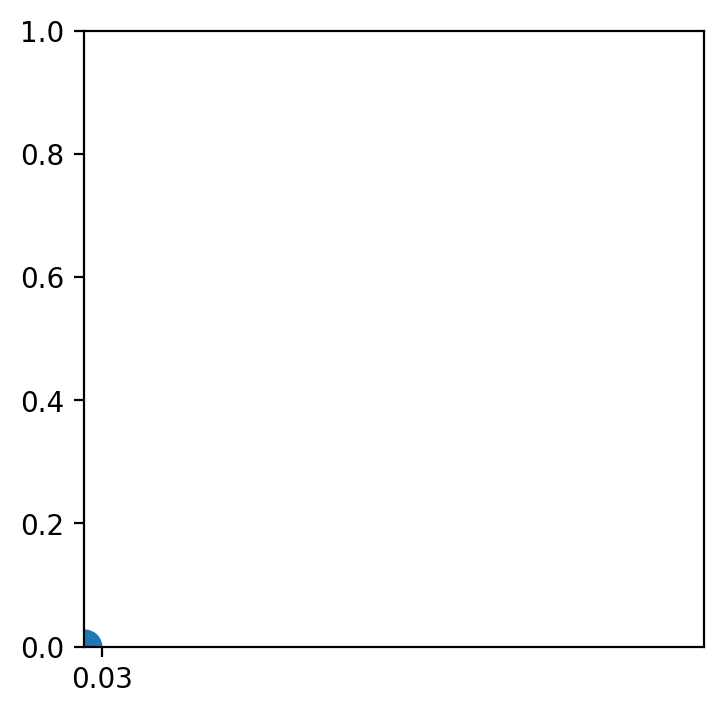

In [91]:
plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes()
ax.scatter(0,0,linewidth=7)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([0.03])

In [7]:
epsilon

NameError: name 'epsilon' is not defined

In [8]:
DIM = 2
nx = 10
N = nx**2
d_perfect = 2**(1/6)*sigma
epsilon = 10
BoxSize = 1
Rcutoff = 2.5*sigma


vol = BoxSize**DIM
#pos = np.random.rand(N,DIM)*BoxSize
x = np.linspace(0,0.8, nx)
#pos,_ = np.meshgrid(x,x)*BoxSize
pos = np.zeros([nx**2,DIM])
for i in range(nx):
    for j in range(nx):
        pos[i+nx*j] = [x[i]*BoxSize,x[j]*BoxSize]

In [9]:
d_perfect

0.056123102415468654

In [56]:
x 

array([0.        , 0.08888889, 0.17777778, 0.26666667, 0.35555556,
       0.44444444, 0.53333333, 0.62222222, 0.71111111, 0.8       ])

In [85]:
Nsteps = 100
dt = 1/2000
T=1e-10
def main(pos,Nsteps,dt,epsilon,BoxSize,DIM):
    fig = plt.figure(figsize = (4,4), dpi=150)
    ax = plt.axes()
    ims = [None for i in range(Nsteps)]
    vel = (np.random.randn(N,DIM)-0.5)
    acc = (np.zeros([N,DIM]))
    E = np.zeros(Nsteps+1)
    vel = 0*vel
    E[0] = sum([sum(vel[i,:]**2) for i in range(N)])
    
    for k in range(Nsteps):
        #for i in range(DIM):
         #   period = np.where(pos[:,i] > 0.5)
          #  pos[period,i]=pos[period,i]-1.0
           # period = np.where(pos[:,i] < -0.5)
            #pos[period,i]=pos[period,i]+1.0
            
       
        
        
       # chi = np.sqrt(T/E[k])
        vel = vel +1/2*dt*acc
        
        acc = Compute_Forces(pos,epsilon,BoxSize,DIM,N)
        
        vel = vel + 1/2*dt*acc
        pos = (pos + dt*vel + 0.5*dt**2*acc)
        pos = pos%BoxSize
        
        im = ax.scatter(pos[:,0],pos[:,1],color='b')
        title = ax.text(0.15*BoxSize,1.05*BoxSize,"N = {} sigma = {} t = {}".format(N,sigma,'%s' % float(str('%s' % float('%.2g' % float(k*dt)))[:4])))
        ims[k] = [im,title]
        E[k+1] = 1/2*sum([sum(vel[i,:]**2) for i in range(N)])
    plt.grid()
    plt.xlim([0,1*BoxSize])
    plt.ylim([0*BoxSize,1*BoxSize])
    #plt.title("Molecular Dynamics")
    plt.rcParams["animation.html"]= 'html5'
    ani = animation.ArtistAnimation(fig,ims,interval = 40,blit=True)
    plt.close
    
    return ani,E

In [86]:
str(float('%.2g' % float(0.11)))[:4]

'0.11'

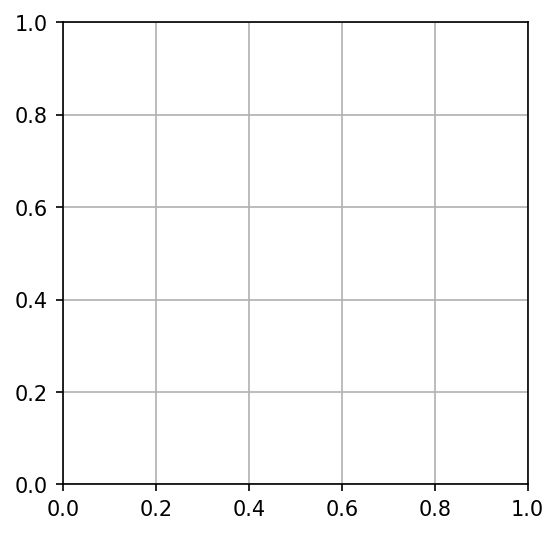

In [87]:
a = main(pos,Nsteps,dt,epsilon,BoxSize,DIM)

Text(0.5, 1.0, 'Kinetic energy vs iteration.')

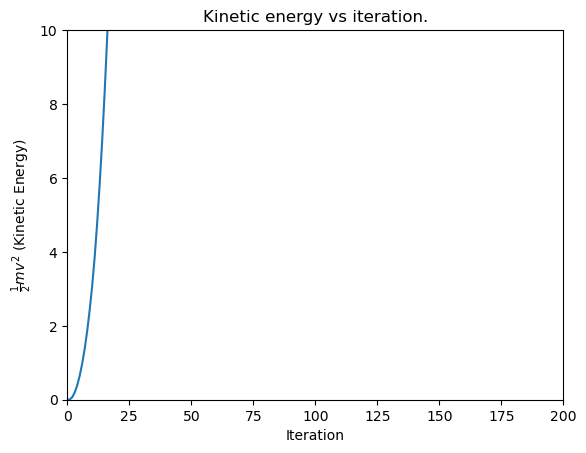

In [88]:
plt.plot(a[1])
plt.xlim([0,200])
plt.ylim([0,10])
plt.xlabel("Iteration")
plt.ylabel(r"$\frac{1}{2}mv^2$ (Kinetic Energy)")
plt.title("Kinetic energy vs iteration.")

In [89]:
a[0]

Text(0.5, 1.0, 'Kinetic energy vs iteration.')

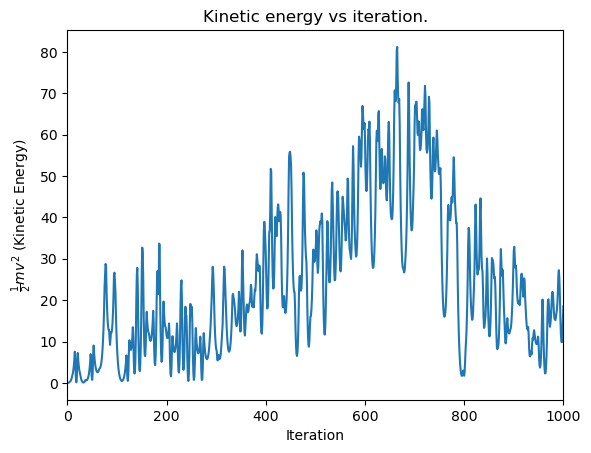

In [ ]:
plt.plot(a[1])

In [ ]:
fig = plt.figure(figsize = (4,4), dpi=150)
ims = [None for i in range(1000)]
#plt.plot(x_plot,rho_inf_vals,color='r')
for a in range(1000):
    
    im = [plt.scatter(pos_save[:,:,a][:,0],pos_save[:,:,a][:,1],color='b') ]
    
    ims[a] = im
plt.grid()
plt.title("Evolution of SDE dynamics and equilibrium solution, $\gamma$=1")
plt.rcParams["animation.html"]= 'html5'
ani = animation.ArtistAnimation(fig,ims,interval = 100)
plt.close()

In [ ]:
pos[1,:]-pos[2,:]

In [ ]:
Sij[1]-np.copysign(1,Sij[1])